In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import datetime
%matplotlib inline

In [46]:
#Load our data
data = pd.read_csv('C:/Users/user pc/Downloads/HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity_20240109.csv')
data.head()

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   YEAR                                                                 8976 non-null   int64 
 1   Borough                                                              6048 non-null   object
 2   Neighborhood (U.H.F)                                                 8976 non-null   object
 3   SEX                                                                  8976 non-null   object
 4   RACE/ETHNICITY                                                       8976 non-null   object
 5   TOTAL NUMBER OF HIV DIAGNOSES                                        8970 non-null   object
 6   HIV DIAGNOSES PER 100,000 POPULATION                                 8902 non-null   object
 7   TOTAL NUMBER OF

In [48]:
data.describe()

,YEAR
count,8976.000000
mean,2016.360963
std,3.703894
min,2010.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2021.000000


In [49]:
categorical = data.dtypes[data.dtypes == 'object'].index
data[categorical].describe()

,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
count,6048,8976,8976,8976,8970,8902,8974,7083,8973,8905
unique,6,66,3,11,306,1260,121,305,238,991
top,Brooklyn,All,Male,All,0,0,0,0,0,0
freq,1512,760,3392,1528,3160,3142,5038,3185,3735,3714


In [50]:
#CLEANING
#Missing Values
#Total number of missing values per column
data.isna().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             6
HIV DIAGNOSES PER 100,000 POPULATION                                     74
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             2
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1893
TOTAL NUMBER OF AIDS DIAGNOSES                                            3
AIDS DIAGNOSES PER 100,000 POPULATION                                    71
dtype: int64

In [51]:
#percentage per column of missing values 
data.isna().sum() / len(data) * 100

YEAR                                                                    0.000000
Borough                                                                32.620321
Neighborhood (U.H.F)                                                    0.000000
SEX                                                                     0.000000
RACE/ETHNICITY                                                          0.000000
TOTAL NUMBER OF HIV DIAGNOSES                                           0.066845
HIV DIAGNOSES PER 100,000 POPULATION                                    0.824421
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0.022282
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    21.089572
TOTAL NUMBER OF AIDS DIAGNOSES                                          0.033422
AIDS DIAGNOSES PER 100,000 POPULATION                                   0.790998
dtype: float64

<Figure size 2000x800 with 0 Axes>

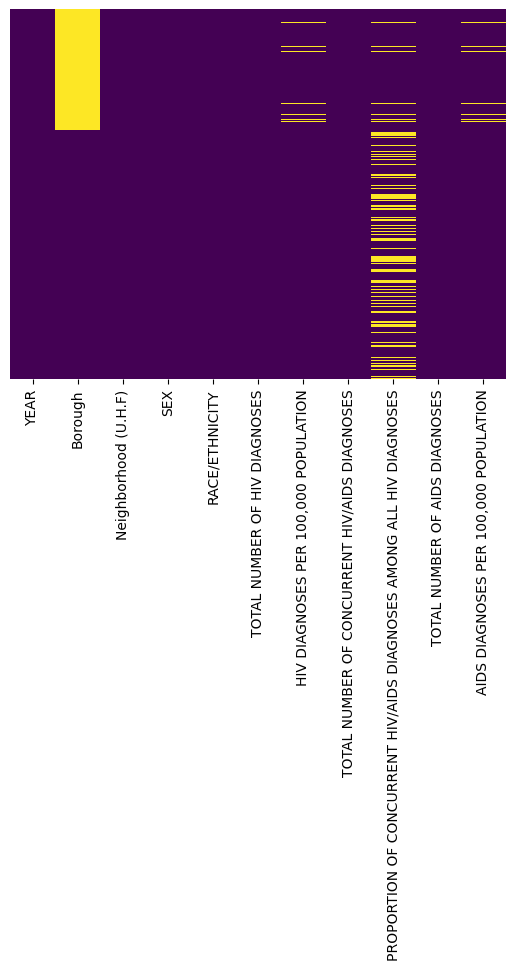

<Figure size 2000x800 with 0 Axes>

In [52]:
#Visual Representation of missing values 
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure(figsize=(20,8))

In [53]:
#Missing values from this column is less than 1%(71 values)
#with values 0 being majority of the values, we fill the missing values in this column with 0
data['AIDS DIAGNOSES PER 100,000 POPULATION'].value_counts()

0        3714
3.3        36
4.8        32
2.5        31
4.1        31
         ... 
118.2       1
65          1
104.9       1
48.4        1
81          1
Name: AIDS DIAGNOSES PER 100,000 POPULATION, Length: 991, dtype: int64

In [54]:
data['AIDS DIAGNOSES PER 100,000 POPULATION'].fillna(value=0,inplace=True)

In [55]:
#with 3 values at less than 1%, we can confidently assign it values 0
data['TOTAL NUMBER OF AIDS DIAGNOSES'].value_counts()

0      3735
1      1040
2       625
3       403
4       298
       ... 
207       1
204       1
235       1
133       1
175       1
Name: TOTAL NUMBER OF AIDS DIAGNOSES, Length: 238, dtype: int64

In [56]:
data['TOTAL NUMBER OF AIDS DIAGNOSES'].fillna(value=0,inplace=True)

In [58]:
data.isna().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             6
HIV DIAGNOSES PER 100,000 POPULATION                                     74
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             2
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1893
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                     0
dtype: int64

In [59]:
data['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].value_counts()

0       3185
50       294
33.3     243
25       227
100      222
        ... 
29.9       1
4.1        1
32.2       1
10.1       1
32.3       1
Name: PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES, Length: 305, dtype: int64

In [60]:
#with 21%(1893) of missing values we assign the values the mean value of the column 
data['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].fillna(value=np.mean,inplace=True)

In [70]:
data.isna().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             0
HIV DIAGNOSES PER 100,000 POPULATION                                      0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES       0
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                     0
dtype: int64

In [63]:
#We assign the 2 missing values 0
data['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].value_counts()

0      5038
1      1201
2       616
3       402
4       276
       ... 
288       1
109       1
62        1
84        1
50        1
Name: TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES, Length: 121, dtype: int64

In [64]:
data['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].fillna(value=0,inplace=True)

In [66]:
#we fill the 74 missing points with the mean of the column
data['HIV DIAGNOSES PER 100,000 POPULATION'].value_counts()

0        3142
5          27
4.2        24
5.1        23
4.1        23
         ... 
53.4        1
241.1       1
162.9       1
118.1       1
90.6        1
Name: HIV DIAGNOSES PER 100,000 POPULATION, Length: 1260, dtype: int64

In [67]:
data['HIV DIAGNOSES PER 100,000 POPULATION'].fillna(value=np.mean,inplace=True)

In [69]:
data['TOTAL NUMBER OF HIV DIAGNOSES'].fillna(value=0,inplace=True)

In [71]:
#With 32% of its points missing 
#and it being a location variable we fill it with an 'NOT RECORDED' string to indicate it was a missing point
data['Borough'].fillna(value="NOT RECORDED",inplace=True)

<Axes: >

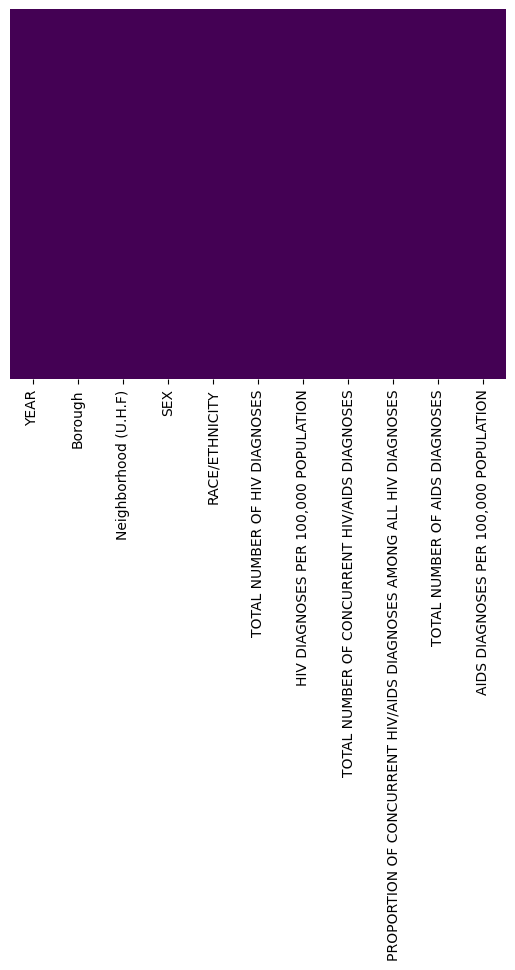

In [72]:
#Confirmation of sorted Missing Values
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [73]:
data.isna().sum()

YEAR                                                                   0
Borough                                                                0
Neighborhood (U.H.F)                                                   0
SEX                                                                    0
RACE/ETHNICITY                                                         0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64

In [74]:
#Now We Check for anomalies and Outliers

In [75]:
data['YEAR'].value_counts()

2020    1728
2016     864
2017     864
2018     864
2019     864
2021     864
2010     732
2011     732
2012     732
2013     732
Name: YEAR, dtype: int64


In [76]:
data['SEX'].value_counts()

Male      3392
Female    3392
All       2192
Name: SEX, dtype: int64

In [77]:
data['RACE/ETHNICITY'].value_counts()

All                        1528
Black                      1352
White                      1352
Asian/Pacific\nIslander    1008
Latino/Hispanic            1008
Other/Unknown              1008
Native American             344
Unknown                     344
Multiracial                 344
Asian/Pacific Islander      344
Hispanic                    344
Name: RACE/ETHNICITY, dtype: int64